<a href="https://colab.research.google.com/github/ReidelVichot/LC_identification/blob/main/AirQuality11_05_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setting the Environment

In [210]:
from google.colab import drive
drive.mount('/content/drive')

# -- Setting environment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

# -- Load county shapefiles
dir = "/content/drive/MyDrive/Disertation/countyshp/"
county = gpd.read_file(dir + "tl_2010_us_county00/tl_2010_us_county00.shp")
county = county[["CNTYIDFP00", "geometry"]]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Defining Functions

In [212]:
def gen_GEOID(df):
  # generate GEOID
  df["GEOID"] = df["State Code"].astype(str).str.zfill(2) + df["County Code"].astype(str).str.zfill(3)
  df = df.drop(columns=["State Code", "County Code"])
  return df

def gen_year(df):
  # get year
  df["year"] = df["Date"].str[:4].astype(int)
  df = df.drop(columns="Date")
  return df

def grouping(df):
  df = df.groupby(["GEOID", "year"]).agg(["mean", "std", "max", "min"])
  # combining columns
  df.columns = ["_".join(col) for col in df.columns]
  df = df.reset_index()
  return df

def get_AQI(year):
  dir = "/content/drive/MyDrive/Disertation/EPA_data/AQI"
  fname = f"/daily_aqi_by_county_{year}.csv"
  df = pd.read_csv(dir + fname, low_memory=False)
  df = df[["State Code", "County Code", "Date", "AQI"]]
  return df

def get_CO(year):
  dir = "/content/drive/MyDrive/Disertation/EPA_data/CO"
  fname = f"/daily_42101_{year}.csv"
  df = pd.read_csv(dir + fname, low_memory=False)
  df = df[["State Code", "County Code", "Date Local", "Arithmetic Mean"]]
  df.columns = ["State Code", "County Code", "Date", "CO"]
  return df

def get_NO2(year):
  dir = "/content/drive/MyDrive/Disertation/EPA_data/NO2"
  fname = f"/daily_42602_{year}.csv"
  df = pd.read_csv(dir + fname, low_memory=False)
  df = df[["State Code", "County Code", "Date Local", "Arithmetic Mean"]]
  df.columns = ["State Code", "County Code", "Date", "NO2"]
  return df

def get_Ozone(year):
  dir = "/content/drive/MyDrive/Disertation/EPA_data/Ozone"
  fname = f"/daily_44201_{year}.csv"
  df = pd.read_csv(dir + fname, low_memory=False)
  df = df[["State Code", "County Code", "Date Local", "Arithmetic Mean"]]
  df.columns = ["State Code", "County Code", "Date", "Ozone"]
  return df

def get_SO2(year):
  dir = "/content/drive/MyDrive/Disertation/EPA_data/SO2"
  fname = f"/daily_42401_{year}.csv"
  df = pd.read_csv(dir + fname, low_memory=False)
  df = df[["State Code", "County Code", "Date Local", "Arithmetic Mean"]]
  df.columns = ["State Code", "County Code", "Date", "SO2"]
  return df

def get_param(param, year):
  match param:
    case "AQI":
      return get_AQI(year)
    case "CO":
      return get_CO(year)
    case "NO2":
      return get_CO(year)
    case "SO2":
      return get_SO2(year)
    case "Ozone":
      return get_Ozone(year)

#Calculating Parameters

##AQI

In [213]:
# -- Create aqi dataframe
aqi = pd.DataFrame()

for year in range(1998, 2023):
  df = grouping(gen_year(gen_GEOID(get_AQI(year))))
  aqi = pd.concat([aqi, df]).reset_index().drop(columns="index")

# -- Merge aqi and county
print(len(aqi))
aqi = county.merge(aqi, right_on="GEOID", left_on="CNTYIDFP00", how="right")
aqi = aqi.drop(columns="CNTYIDFP00")
print(len(aqi))

26504
26504


##CO

In [191]:
# -- Create CO dataframe
co = pd.DataFrame()

for year in range(1998, 2023):
  df = grouping(gen_year(gen_GEOID(get_CO(year))))
  co = pd.concat([co, df]).reset_index().drop(columns="index")

# -- Merge CO and county
print(len(co))
co = county.merge(co, right_on="GEOID", left_on="CNTYIDFP00", how="right")
co = co.drop(columns="CNTYIDFP00")
print(len(co))

5214
5214


##NO2

In [192]:
# -- Create NO2 dataframe
no2 = pd.DataFrame()

for year in range(1998, 2023):
  df = grouping(gen_year(gen_GEOID(get_NO2(year))))
  no2 = pd.concat([no2, df]).reset_index().drop(columns="index")

# -- Merge NO2 and county
print(len(no2))
no2 = county.merge(no2, right_on="GEOID", left_on="CNTYIDFP00", how="right")
no2 = no2.drop(columns="CNTYIDFP00")
print(len(no2))

6328
6328


##Ozone

In [193]:
# -- Create ozone dataframe
ozone = pd.DataFrame()

for year in range(1998, 2023):
  df = grouping(gen_year(gen_GEOID(get_Ozone(year))))
  ozone = pd.concat([ozone, df]).reset_index().drop(columns="index")

# -- Merge ozone and county
print(len(ozone))
ozone = county.merge(ozone, right_on="GEOID", left_on="CNTYIDFP00", how="right")
ozone = ozone.drop(columns="CNTYIDFP00")
print(len(ozone))

19088
19088


##SO2

In [194]:
# -- Create so2 dataframe
so2 = pd.DataFrame()

for year in range(1998, 2023):
  df = grouping(gen_year(gen_GEOID(get_SO2(year))))
  so2 = pd.concat([so2, df]).reset_index().drop(columns="index")

# -- Merge so2 and county
print(len(so2))
so2 = county.merge(so2, right_on="GEOID", left_on="CNTYIDFP00", how="right")
so2 = so2.drop(columns="CNTYIDFP00")
print(len(so2))

8248
8248


#Descriptive Statistics

In [207]:
# Save Everything
aqi.to_csv("/content/drive/MyDrive/Disertation/aqi.csv", index=False)
co.to_csv("/content/drive/MyDrive/Disertation/co.csv", index=False)
no2.to_csv("/content/drive/MyDrive/Disertation/no2.csv", index=False)
ozone.to_csv("/content/drive/MyDrive/Disertation/ozone.csv", index=False)
so2.to_csv("/content/drive/MyDrive/Disertation/so2.csv", index=False)

KeyboardInterrupt: 

In [196]:
print(aqi.AQI_mean.describe(), end="\n\n")
print(co.CO_mean.describe(), end="\n\n")
print(no2.NO2_mean.describe(), end="\n\n")
print(ozone.Ozone_mean.describe(), end="\n\n")
print(so2.SO2_mean.describe(), end="\n\n")

count    26504.000000
mean        44.416082
std         13.824950
min          2.161111
25%         37.287642
50%         44.551299
75%         52.108661
max        326.441096
Name: AQI_mean, dtype: float64

count    5214.000000
mean        0.435938
std         0.275852
min        -0.067848
25%         0.245580
50%         0.369089
75%         0.551664
max         1.960390
Name: CO_mean, dtype: float64

count    6328.000000
mean        9.450279
std         6.157836
min         0.000000
25%         4.538206
50%         8.492320
75%        12.982144
max        41.910996
Name: NO2_mean, dtype: float64

count    19088.000000
mean         0.032457
std          0.005542
min          0.003365
25%          0.028884
50%          0.032205
75%          0.035581
max          0.061977
Name: Ozone_mean, dtype: float64

count    8248.000000
mean        2.357878
std         2.473694
min        -0.556879
25%         0.580767
50%         1.424342
75%         3.405177
max        22.010259
Name: SO2_mean,

In [197]:
# Removing Non-contiguous counties
for i in ['02', '15', '60', '66', '69', '72', '78', "80"]:
  aqi = aqi[aqi.GEOID.str[:2] != i]
  co = co[co.GEOID.str[:2] != i]
  no2 = no2[no2.GEOID.str[:2] != i]
  ozone = ozone[ozone.GEOID.str[:2] != i]
  so2 = so2[so2.GEOID.str[:2] != i]

In [198]:
aqi.groupby(["year", "GEOID"]).mean(numeric_only=True)

AQI_mean    AQI_std  AQI_max  AQI_min
year GEOID                                        
1998 01015  23.886364   9.371446     51.0     10.0
     01027  65.610329  35.938276    185.0      9.0
     01033  20.291667   8.972673     41.0      7.0
     01049  61.330579  41.660836    205.0      3.0
     01051  57.559242  33.200833    203.0      9.0
...               ...        ...      ...      ...
2022 56035  46.531507   8.960366    105.0     28.0
     56037  46.805479  12.835090    157.0     30.0
     56039  42.920548   7.422622    100.0     22.0
     56041   9.008219   7.351642     55.0      1.0
     56045  40.297521   6.141937     64.0     15.0

[25785 rows x 4 columns]

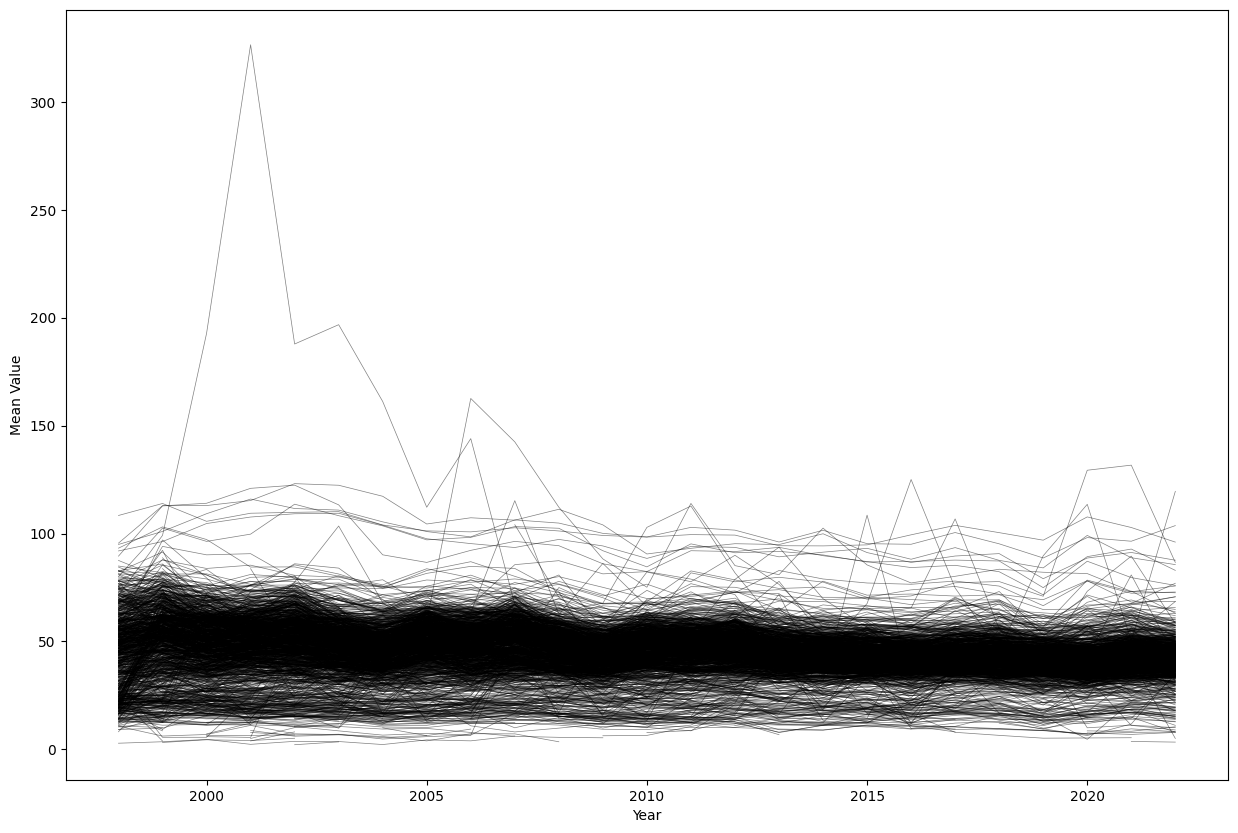

In [199]:
# Plotting trends
fig, ax = plt.subplots(figsize=(15, 10))

for i in aqi.GEOID.unique():
  df = aqi[aqi.GEOID == i]
  ax.plot(df.year, df.AQI_mean, color="black", alpha=0.5, linewidth=0.5 )



ax.set_xlabel("Year")
ax.set_ylabel("Mean Value")

fig.show()

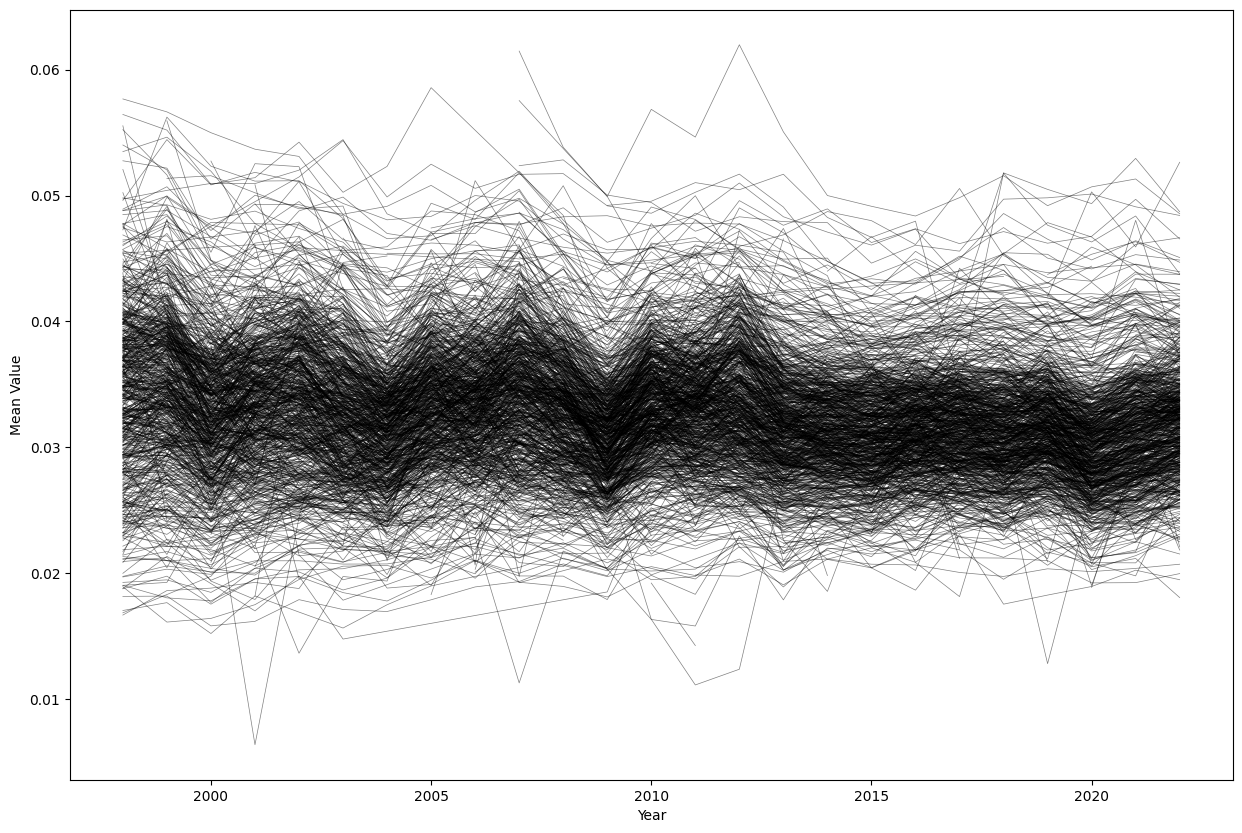

In [200]:
# Plotting trends
fig, ax = plt.subplots(figsize=(15, 10))

for i in ozone.GEOID.unique():
  df = ozone[ozone.GEOID == i]
  ax.plot(df.year, df.Ozone_mean, color="black", alpha=0.5, linewidth=0.5 )



ax.set_xlabel("Year")
ax.set_ylabel("Mean Value")

fig.show()

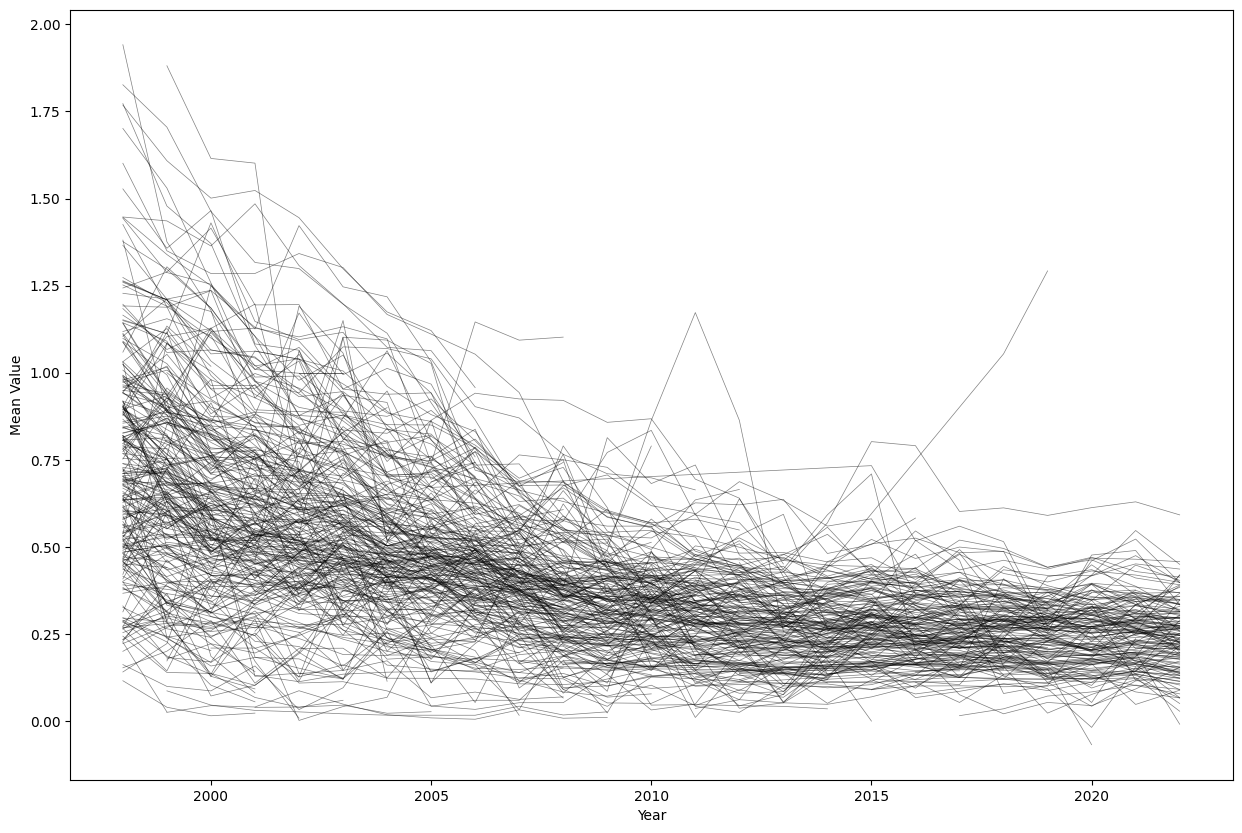

In [201]:
# Plotting trends
fig, ax = plt.subplots(figsize=(15, 10))

for i in co.GEOID.unique():
  df = co[co.GEOID == i]
  ax.plot(df.year, df.CO_mean, color="black", alpha=0.5, linewidth=0.5 )

ax.set_xlabel("Year")
ax.set_ylabel("Mean Value")

fig.show()

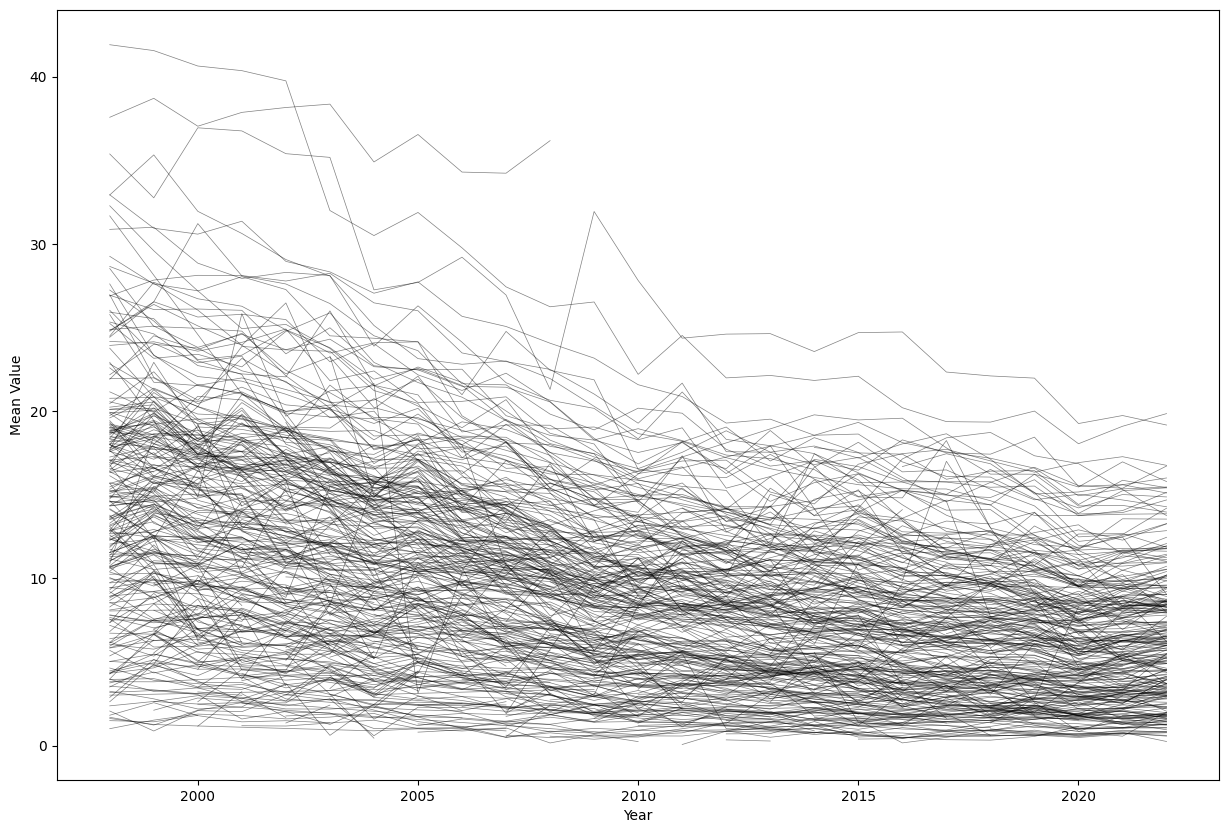

In [202]:
# Plotting trends
fig, ax = plt.subplots(figsize=(15, 10))

for i in no2.GEOID.unique():
  df = no2[no2.GEOID == i]
  ax.plot(df.year, df.NO2_mean, color="black", alpha=0.5, linewidth=0.5 )

ax.set_xlabel("Year")
ax.set_ylabel("Mean Value")

fig.show()

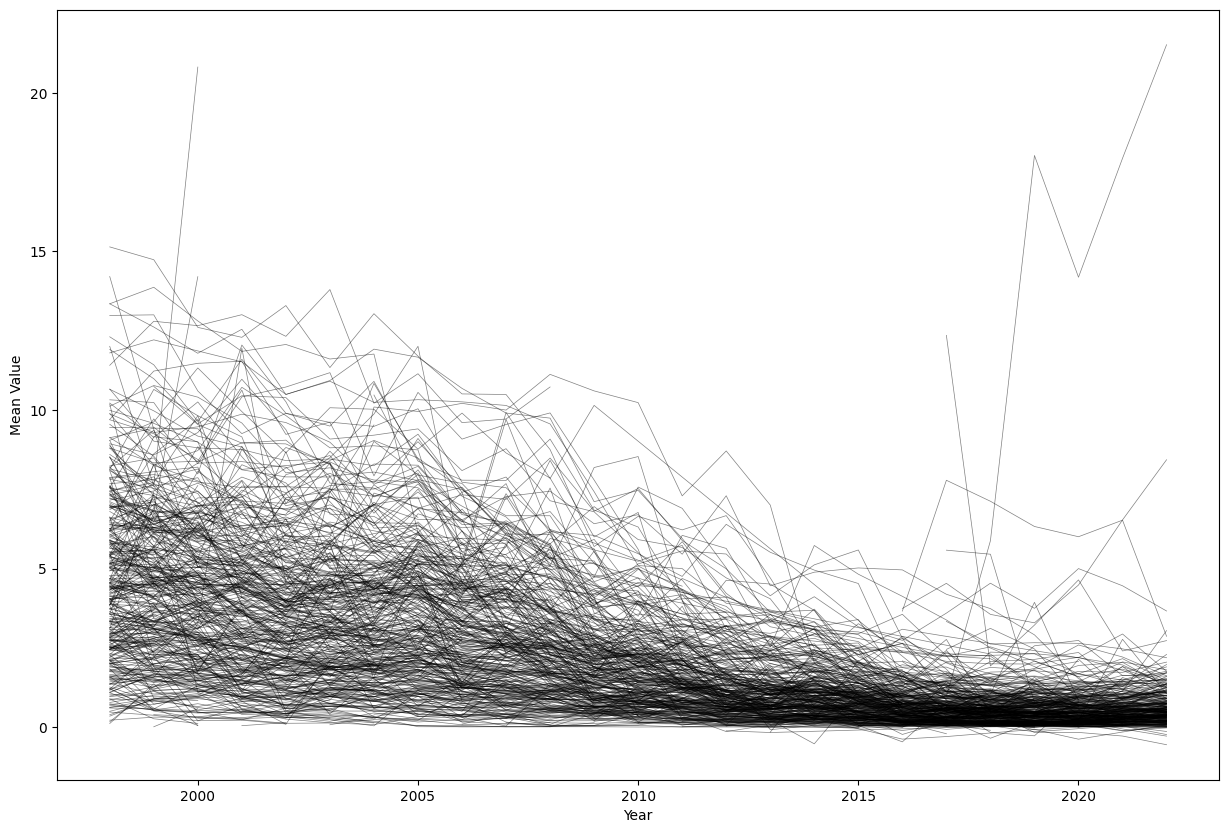

In [203]:
# Plotting trends
fig, ax = plt.subplots(figsize=(15, 10))

for i in so2.GEOID.unique():
  df = so2[so2.GEOID == i]
  ax.plot(df.year, df.SO2_mean, color="black", alpha=0.5, linewidth=0.5 )

ax.set_xlabel("Year")
ax.set_ylabel("Mean Value")

fig.show()